# Predict Stock Market with Machine Learning

## Install Dependencies

In [ ]:
!pip install yfinance==0.2.54
!pip install matplotlib==3.10.1
!pip install pandas==2.2.3
!pip install scikit-learn==1.6.1

## Import Dependencies

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import yfinance as yf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score



In [2]:
sp500 = yf.Ticker("^GSPC")
sp500 = sp500.history(period="max")
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-03-13 00:00:00-04:00,5594.450195,5597.779785,5504.649902,5521.520020,5018980000,0.0,0.0
2025-03-14 00:00:00-04:00,5563.850098,5645.270020,5563.850098,5638.939941,4863180000,0.0,0.0
2025-03-17 00:00:00-04:00,5635.600098,5703.520020,5631.120117,5675.120117,5031770000,0.0,0.0


In [3]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2025-03-06 00:00:00-05:00', '2025-03-07 00:00:00-05:00',
               '2025-03-10 00:00:00-04:00', '2025-03-11 00:00:00-04:00',
               '2025-03-12 00:00:00-04:00', '2025-03-13 00:00:00-04:00',
               '2025-03-14 00:00:00-04:00', '2025-03-17 00:00:00-04:00',
               '2025-03-18 00:00:00-04:00', '2025-03-19 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24419, freq=None)

<Axes: xlabel='Date'>

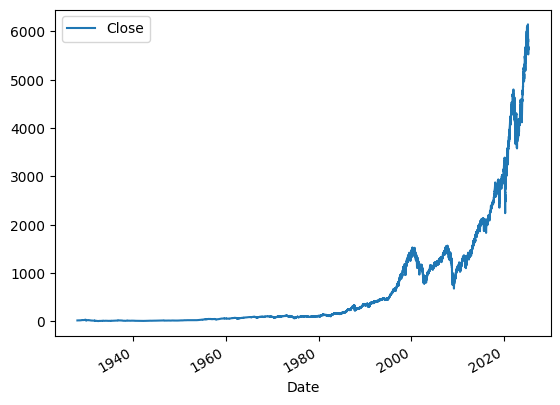

In [4]:
sp500.plot.line(y="Close", use_index=True)

## Data Pre-processing

In [5]:
# removed because they are needed for individual stocks not index
del sp500["Dividends"]
del sp500["Stock Splits"]

In [6]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [7]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2025-03-13 00:00:00-04:00,5594.450195,5597.779785,5504.649902,5521.520020,5018980000,5638.939941
2025-03-14 00:00:00-04:00,5563.850098,5645.270020,5563.850098,5638.939941,4863180000,5675.120117
2025-03-17 00:00:00-04:00,5635.600098,5703.520020,5631.120117,5675.120117,5031770000,5614.660156


In [8]:
# Note: I am trying to predict if the prices will go up or down not the actual prices
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [9]:
# Just using the recent years
sp500 = sp500.loc["1990-01-01":].copy()

In [10]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2025-03-13 00:00:00-04:00,5594.450195,5597.779785,5504.649902,5521.520020,5018980000,5638.939941,1
2025-03-14 00:00:00-04:00,5563.850098,5645.270020,5563.850098,5638.939941,4863180000,5675.120117,1
2025-03-17 00:00:00-04:00,5635.600098,5703.520020,5631.120117,5675.120117,5031770000,5614.660156,0


## Training the Model

In [11]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [12]:
preds = model.predict(test[predictors])

In [13]:
preds = pd.Series(preds, index = test.index)

In [14]:
precision_score(test["Target"], preds)

0.6

In [15]:
combined = pd.concat([test["Target"], preds], axis=1)

<Axes: xlabel='Date'>

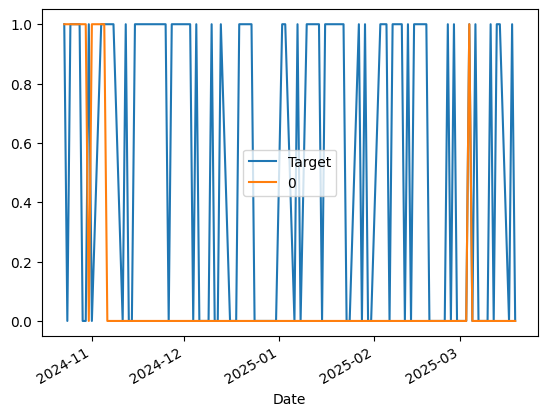

In [16]:
combined.plot()

## Adding Back Testing System to the Model

In [17]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test['Target'], preds], axis=1)
    return combined

In [18]:
# First model is trained on 2500 days or roughly 10 years of data and predict (10+1)th year and so on
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test=data.iloc[i:(step+i)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)
        

In [19]:
predictions = backtest(sp500, model, predictors)

In [20]:
predictions["Predictions"].value_counts()

Predictions
0    3730
1    2639
Name: count, dtype: int64

In [21]:
precision_score(predictions["Target"], predictions["Predictions"])

0.52860932171277

In [22]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.535877
0    0.464123
Name: count, dtype: float64

## Adding more Predictors

In [23]:
horizons = [2,5,60,250,1000] # check the change in price between today and horizon days to see if it is due for going down
new_predictors = []
for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    new_predictors += [ratio_column, trend_column]

In [24]:
sp500 = sp500.dropna() #remove the ones that it can't compare with because no days there

In [25]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-12 00:00:00-04:00,5624.839844,5642.189941,5546.089844,5599.299805,5219830000,5521.520020,0,1.002437,1.0,0.989463,2.0,0.938958,29.0,0.995717,140.0,1.210871,527.0
2025-03-13 00:00:00-04:00,5594.450195,5597.779785,5504.649902,5521.520020,5018980000,5638.939941,1,0.993006,1.0,0.983259,2.0,0.927288,29.0,0.981637,140.0,1.193636,527.0
2025-03-14 00:00:00-04:00,5563.850098,5645.270020,5563.850098,5638.939941,4863180000,5675.120117,1,1.010521,1.0,1.008885,2.0,0.948101,30.0,1.002164,141.0,1.218572,527.0


In [26]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [27]:
# Reduce trade frequency while increasing profit
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1] #probability of stock price going up
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test['Target'], preds], axis=1)
    return combined

In [28]:
predictions = backtest(sp500, model, new_predictors)

In [29]:
predictions["Predictions"].value_counts()

Predictions
0.0    4502
1.0     866
Name: count, dtype: int64

In [30]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5715935334872979

C:\Users\Natha\AppData\Local\Temp\ipykernel_12080\1597468764.py:205: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.09669776883354893' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  portfolio.loc[date, 'Shares'] = shares_to_buy
C:\Users\Natha\AppData\Local\Temp\ipykernel_12080\1597468764.py:191: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '100.80161647695985' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  portfolio.loc[date, 'Portfolio_Value'] = portfolio.loc[date, 'Shares'] * portfolio.loc[date, 'Close'] + portfolio.loc[date, 'Cash']
C:\Users\Natha\AppData\Local\Temp\ipykernel_12080\1597468764.py:226: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '99.951651

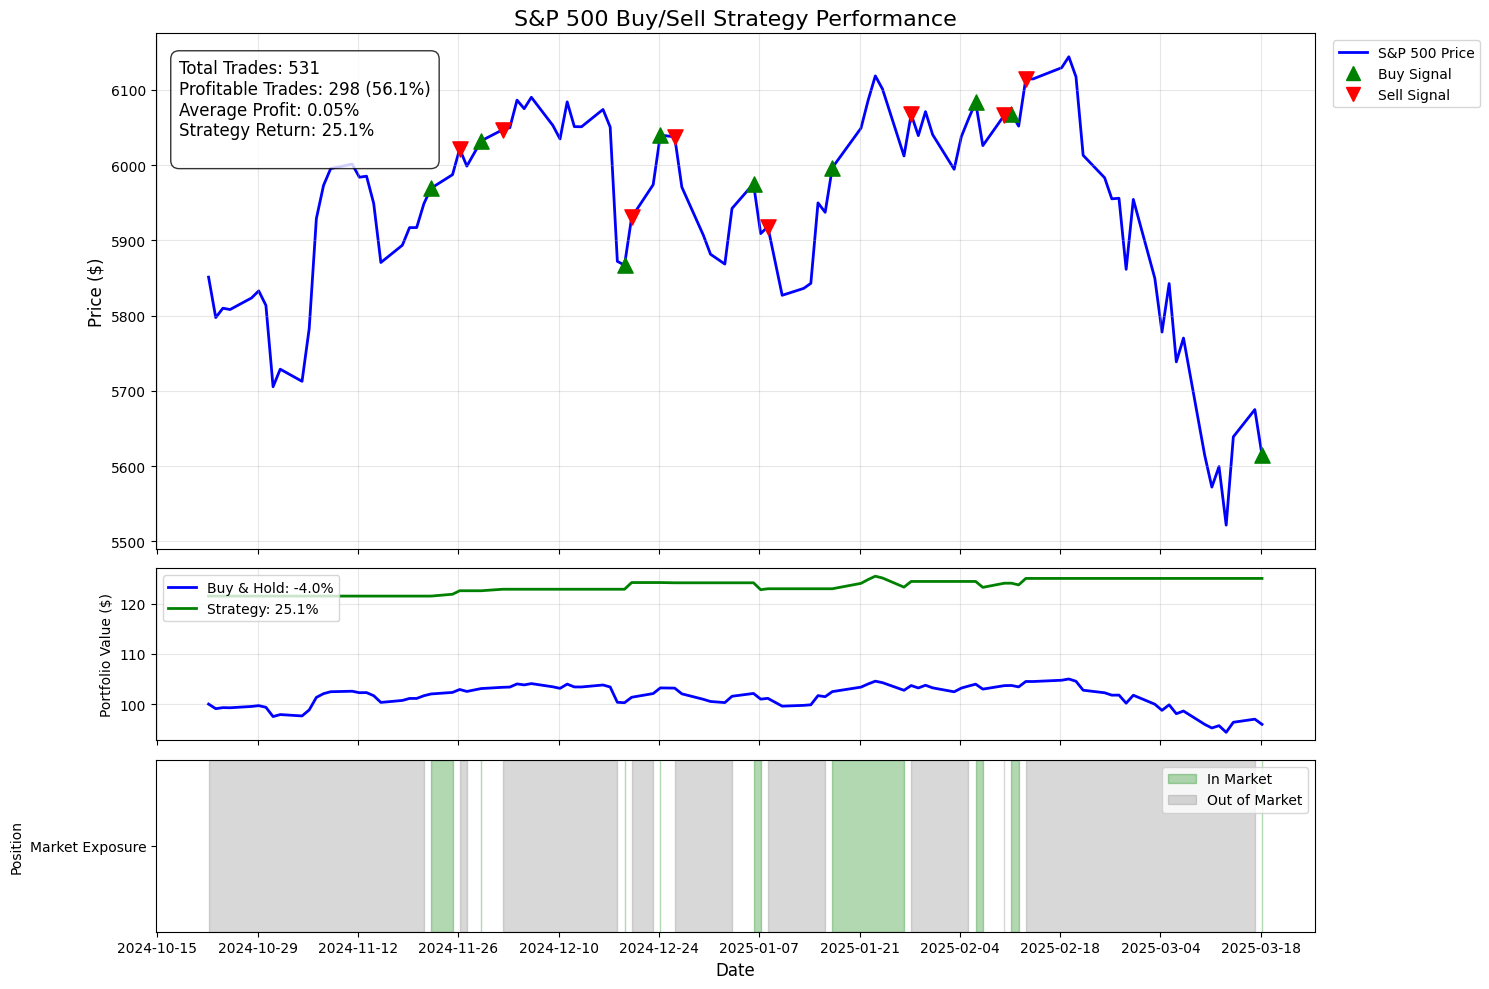

In [36]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec

def plot_prediction_results_buy_sell(df, predictions, title="S&P 500 Buy/Sell Strategy Performance", days=100):
    """
    Visualize stock prediction results with a buy/sell strategy:
    - Buy when model predicts up
    - Sell when model next predicts down
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame with stock price data including 'Close'
    predictions : pandas.DataFrame
        DataFrame with 'Target' and 'Predictions' columns
    title : str
        Title for the plot
    days : int
        Number of days to display (default: 100)
    """
    # Combine data and predictions
    combined = pd.concat([df['Close'], predictions], axis=1)
    
    # Calculate trading signals and portfolio value
    trading_stats = calculate_buy_sell_strategy(df, predictions)
    portfolio_value = trading_stats['portfolio_values']
    
    # If we want to show only last X days
    if days and days < len(combined):
        combined = combined.tail(days)
        portfolio_value = portfolio_value.tail(days)
    
    # Create a figure with multiple subplots
    fig = plt.figure(figsize=(15, 10))
    gs = gridspec.GridSpec(3, 1, height_ratios=[3, 1, 1])
    
    # Price chart with buy/sell markers
    ax1 = plt.subplot(gs[0])
    
    # Plot price line
    ax1.plot(combined.index, combined['Close'], 'b-', linewidth=2, zorder=1, label='S&P 500 Close Price')
    
    # Format dates on x-axis
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax1.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))  # Adjust interval as needed
    plt.xticks(rotation=45)
    
    # Plot buy and sell markers
    buy_dates = trading_stats['buy_dates']
    sell_dates = trading_stats['sell_dates']
    
    buy_prices = [df.loc[date, 'Close'] for date in buy_dates if date in combined.index]
    sell_prices = [df.loc[date, 'Close'] for date in sell_dates if date in combined.index]
    
    # Filter to only show buy/sell markers within the displayed date range
    filtered_buy_dates = [date for date in buy_dates if date in combined.index]
    filtered_sell_dates = [date for date in sell_dates if date in combined.index]
    
    ax1.scatter(filtered_buy_dates, buy_prices, marker='^', color='green', s=120, zorder=2, label='Buy Signal')
    ax1.scatter(filtered_sell_dates, sell_prices, marker='v', color='red', s=120, zorder=2, label='Sell Signal')
    
    # Set title and labels
    ax1.set_title(title, fontsize=16)
    ax1.set_ylabel('Price ($)', fontsize=12)
    ax1.grid(True, alpha=0.3)
    
    # Add metrics to the chart
    metrics_text = (
        f"Total Trades: {trading_stats['total_trades']}\n"
        f"Profitable Trades: {trading_stats['profitable_trades']} ({trading_stats['win_rate']:.1f}%)\n"
        f"Average Profit: {trading_stats['avg_profit']:.2f}%\n"
        f"Strategy Return: {trading_stats['strategy_return']:.1f}%\n"
    )
    
    ax1.text(0.02, 0.95, metrics_text, transform=ax1.transAxes, 
             bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5'), fontsize=12,
             verticalalignment='top')
    
    # Create a custom legend
    legend_elements = [
        Line2D([0], [0], color='b', lw=2, label='S&P 500 Price'),
        Line2D([0], [0], marker='^', color='green', markersize=10, linestyle='', label='Buy Signal'),
        Line2D([0], [0], marker='v', color='red', markersize=10, linestyle='', label='Sell Signal')
    ]
    ax1.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.01, 1), fontsize=10)
    
    # Plot strategy performance
    ax2 = plt.subplot(gs[1], sharex=ax1)
    
    # Calculate buy and hold value
    buy_hold_start = portfolio_value.index[0]
    buy_hold_end = portfolio_value.index[-1]
    buy_hold_start_price = df.loc[buy_hold_start, 'Close']
    buy_hold_end_price = df.loc[buy_hold_end, 'Close']
    buy_hold_return = (buy_hold_end_price / buy_hold_start_price - 1) * 100
    
    buy_hold_values = df.loc[portfolio_value.index, 'Close'] / df.loc[portfolio_value.index[0], 'Close'] * 100
    
    ax2.plot(portfolio_value.index, buy_hold_values, 'b-', linewidth=2, label=f'Buy & Hold: {buy_hold_return:.1f}%')
    ax2.plot(portfolio_value.index, portfolio_value.values, 'g-', linewidth=2, 
             label=f'Strategy: {trading_stats["strategy_return"]:.1f}%')
    
    ax2.legend(loc='upper left')
    ax2.set_ylabel('Portfolio Value ($)', fontsize=10)
    ax2.grid(True, alpha=0.3)
    
    # Plot market exposure
    ax3 = plt.subplot(gs[2], sharex=ax1)
    
    # Create an array showing market exposure (1 when holding, 0 when not)
    exposure = trading_stats['market_exposure'].loc[combined.index]
    
    # Plot market exposure
    ax3.fill_between(exposure.index, 0, 1, where=exposure == 1, color='green', alpha=0.3, label='In Market')
    ax3.fill_between(exposure.index, 0, 1, where=exposure == 0, color='gray', alpha=0.3, label='Out of Market')
    
    # Set y-ticks and labels
    ax3.set_yticks([0.5])
    ax3.set_yticklabels(['Market Exposure'])
    ax3.set_ylabel('Position', fontsize=10)
    ax3.set_xlabel('Date', fontsize=12)
    ax3.set_ylim(0, 1)
    ax3.legend(loc='upper right')
    
    # Hide x-tick labels for first two subplots
    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.setp(ax2.get_xticklabels(), visible=False)
    
    plt.tight_layout()
    return fig


def calculate_buy_sell_strategy(df, predictions, initial_capital=100):
    """
    Calculate performance for a strategy that:
    - Buys when model predicts up
    - Sells when model next predicts down
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame with stock price data including 'Close'
    predictions : pandas.DataFrame
        DataFrame with 'Target' and 'Predictions' columns
    initial_capital : float
        Starting capital amount
    
    Returns:
    --------
    dict
        Dictionary with trading statistics
    """
    # Combine data and predictions
    combined = pd.concat([df['Close'], predictions], axis=1)
    
    # Calculate daily returns
    combined['Daily_Return'] = combined['Close'].pct_change()
    
    # Create a new DataFrame with the same index
    portfolio = pd.DataFrame(index=combined.index)
    portfolio['Close'] = combined['Close']
    portfolio['Prediction'] = combined['Predictions']
    portfolio['Position'] = 0  # 0 = no position, 1 = long position
    portfolio['Portfolio_Value'] = initial_capital
    portfolio['Cash'] = initial_capital
    portfolio['Shares'] = 0
    portfolio['Trade'] = 0  # 0 = no trade, 1 = buy, -1 = sell
    
    # Track buy/sell dates and trade performance
    buy_dates = []
    sell_dates = []
    trade_returns = []
    
    # Simulate trading
    in_position = False
    entry_price = 0
    
    for i in range(1, len(portfolio)):
        date = portfolio.index[i]
        prev_date = portfolio.index[i-1]
        
        # Update portfolio value based on market movements
        if in_position:
            portfolio.loc[date, 'Shares'] = portfolio.loc[prev_date, 'Shares']
            portfolio.loc[date, 'Cash'] = portfolio.loc[prev_date, 'Cash']
            portfolio.loc[date, 'Position'] = 1
            portfolio.loc[date, 'Portfolio_Value'] = portfolio.loc[date, 'Shares'] * portfolio.loc[date, 'Close'] + portfolio.loc[date, 'Cash']
        else:
            portfolio.loc[date, 'Cash'] = portfolio.loc[prev_date, 'Cash']
            portfolio.loc[date, 'Shares'] = 0
            portfolio.loc[date, 'Position'] = 0
            portfolio.loc[date, 'Portfolio_Value'] = portfolio.loc[date, 'Cash']
        
        # Process buy signal
        if not in_position and portfolio.loc[prev_date, 'Prediction'] == 1:
            # Buy signal
            price = portfolio.loc[date, 'Close']
            cash_available = portfolio.loc[date, 'Cash']
            shares_to_buy = cash_available / price
            
            portfolio.loc[date, 'Shares'] = shares_to_buy
            portfolio.loc[date, 'Cash'] = 0
            portfolio.loc[date, 'Position'] = 1
            portfolio.loc[date, 'Trade'] = 1
            portfolio.loc[date, 'Portfolio_Value'] = shares_to_buy * price
            
            in_position = True
            entry_price = price
            buy_dates.append(date)
        
        # Process sell signal
        elif in_position and portfolio.loc[prev_date, 'Prediction'] == 0:
            # Sell signal
            price = portfolio.loc[date, 'Close']
            shares_to_sell = portfolio.loc[date, 'Shares']
            
            # Calculate trade return
            trade_return = (price / entry_price - 1) * 100
            trade_returns.append(trade_return)
            
            portfolio.loc[date, 'Shares'] = 0
            portfolio.loc[date, 'Cash'] = shares_to_sell * price
            portfolio.loc[date, 'Position'] = 0
            portfolio.loc[date, 'Trade'] = -1
            portfolio.loc[date, 'Portfolio_Value'] = shares_to_sell * price
            
            in_position = False
            sell_dates.append(date)
    
    # Calculate statistics
    total_trades = len(trade_returns)
    profitable_trades = sum(1 for ret in trade_returns if ret > 0)
    
    if total_trades > 0:
        win_rate = (profitable_trades / total_trades) * 100
        avg_profit = sum(trade_returns) / total_trades
    else:
        win_rate = 0
        avg_profit = 0
    
    # Calculate returns
    start_value = portfolio['Portfolio_Value'].iloc[0]
    end_value = portfolio['Portfolio_Value'].iloc[-1]
    strategy_return = (end_value / start_value - 1) * 100
    
    # Calculate buy and hold return
    start_price = combined['Close'].iloc[0]
    end_price = combined['Close'].iloc[-1]
    buy_hold_return = (end_price / start_price - 1) * 100
    
    # Calculate market exposure
    exposure = portfolio['Position'].copy()
    market_exposure_pct = portfolio['Position'].mean() * 100
    
    # Calculate Sharpe ratio (simplified, assuming risk-free rate = 0)
    portfolio['Daily_Return'] = portfolio['Portfolio_Value'].pct_change()
    strategy_volatility = portfolio['Daily_Return'].std() * np.sqrt(252)  # Annualized volatility
    
    # Annualized return
    days = (portfolio.index[-1] - portfolio.index[0]).days
    years = max(days / 365.25, 0.01)  # Avoid division by zero
    annualized_return = ((1 + strategy_return/100) ** (1/years) - 1) * 100
    
    # Sharpe ratio
    sharpe_ratio = (annualized_return/100) / strategy_volatility if strategy_volatility > 0 else 0
    
    # Maximum drawdown
    portfolio['Peak'] = portfolio['Portfolio_Value'].cummax()
    portfolio['Drawdown'] = (portfolio['Portfolio_Value'] - portfolio['Peak']) / portfolio['Peak'] * 100
    max_drawdown = portfolio['Drawdown'].min()
    
    return {
        'total_trades': total_trades,
        'profitable_trades': profitable_trades,
        'win_rate': win_rate,
        'avg_profit': avg_profit,
        'strategy_return': strategy_return,
        'buy_hold_return': buy_hold_return,
        'annualized_return': annualized_return,
        'sharpe_ratio': sharpe_ratio,
        'max_drawdown': max_drawdown,
        'market_exposure_pct': market_exposure_pct,
        'buy_dates': buy_dates,
        'sell_dates': sell_dates,
        'portfolio_values': portfolio['Portfolio_Value'],
        'market_exposure': exposure
    }

fig = plot_prediction_results_buy_sell(sp500, predictions)
plt.savefig('stock_prediction_buy_sell.png', dpi=300, bbox_inches='tight')
plt.show()